# Methods and Plan & Computational Code and Output 
## Individual Assignment #2

### Anna MacRae (17865668)

## Data Description

The selected dataset for our group is the **Heart Disease Dataset**

Downloaded from Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

This dataset from 1988 is from the Public Health Dataset and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.

The dataset is intended for research on heart disease prediction, focusing on identifying the presence or absence of heart disease based on various medical and demographic attributes.

**Number of observations:** 1025
<br>
**Total attributes:** 76
<br>
**Commonly used variables:** 14

| Variable | Type | Description |
|----------|------|-------------|
| age | Continuous | age of patient in years |
| sex | Categorical | sex of patient (1 = male; 0 = female) |
| cp | Categorical | chest pain type (4 types) |
| trestbps | Continuous | resting blood pressure (in mm Hg on admission to the hospital)|
| chol | Continuous | serum cholestoral in mg/dl |
| fbs | Categorical | (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false) |
| restecg | Categorical | resting electrocardiographic results (values 0,1,2) |
| thalach | Continuous | maximum heart rate achieved |
| exang | Categorical | exercise induced angina (1 = yes; 0 = no) |
| oldpeak | Continuous | ST depression induced by exercise relative to rest |
| slope | Categorical | the slope of the peak exercise ST segment |
| ca | Categorical | number of major vessels (0-3) colored by flourosopy |
| thal | Categorical | thal: 0 = normal; 1 = fixed defect; 2 = reversable defect|
| target | Categorical | presence of heart disease in the patient (0 = no disease and 1 = disease) |




## Question

**Can we predict the presence of heart disease in a patient based on medical and demographic factors such as age, chest pain type, cholesterol levels, and maximum heart rate achieved?**

**Response Variable:** target (0 = no disease, 1 = disease)

**Explanatory Variables:** age, cp (chest pain type), chol (serum cholesterol), thalach (maximum heart rate), and potentially others, such as trestbps (resting blood pressure) and sex.

The dataset includes 1,025 observations across 14 relevant variables, providing a broad base of medical and demographic information that can help us explore the association between these factors and the presence of heart disease. By analyzing the relationships between the explanatory variables and the response variable, we can build a model to assess how factors like chest pain type and cholesterol levels influence the likelihood of heart disease.

This question is focused both on prediction and inference:

**Inference:** Understanding the influence of specific variables, such as chest pain type or cholesterol level, on heart disease risk. By analyzing coefficients and significance in a predictive model, we can infer which factors are most strongly associated with heart disease presence.

**Prediction:** Developing a model to accurately predict the presence of heart disease in new patients based on their characteristics. This would involve training a classification model to generalize well to unseen data.

## Explanatory Data Analysis and Visualization

### Load Dataset

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
heart_data <- read_csv("data/heart.csv", show_col_types = FALSE)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


### Clean and Wrangle

In [3]:
# Convert categorical variables
heart_data <- 
    heart_data %>%
    mutate(across(c(sex, cp, fbs, restecg, exang, slope, ca, thal, target), as.factor))

In [4]:
# Check for missing values
sum(is.na(heart_data))

[1] 0

There are no missing values

In [5]:
# Rename columns for easier understanding
heart_data <- heart_data %>% 
rename(chest_pain_type = cp, cholesterol = chol, resting_bp = trestbps, fasting_blood_sugar = fbs, resting_ecg = restecg, max_heart_rate = thalach, exercise_induced_angina = exang, ST_depression = oldpeak, vessels_num = ca)

head(heart_data)

age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


### Visualization

Create histograms for key variables in relation to the target variable

These visualizations are helpful and relevant because they allow us to explore patterns in key variables (age, cholesterol level and maximum heart rate) in relation to the target variable, heart disease presence.

In [6]:
library(ggplot2)

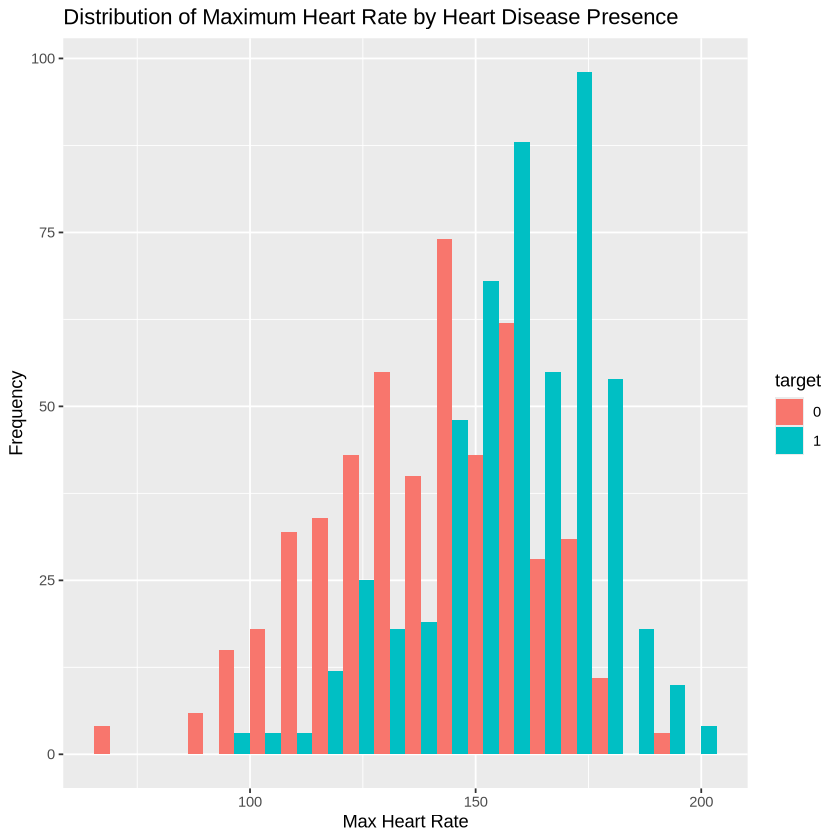

In [7]:
ggplot(heart_data, aes(x = max_heart_rate, fill = target)) +
geom_histogram(position = "dodge", bins = 20) +
labs(title = "Distribution of Maximum Heart Rate by Heart Disease Presence",
       x = "Max Heart Rate", y = "Frequency")

Based on the histogram above we can imply that a higher maximum heart rate is an important indicator of heart disease.

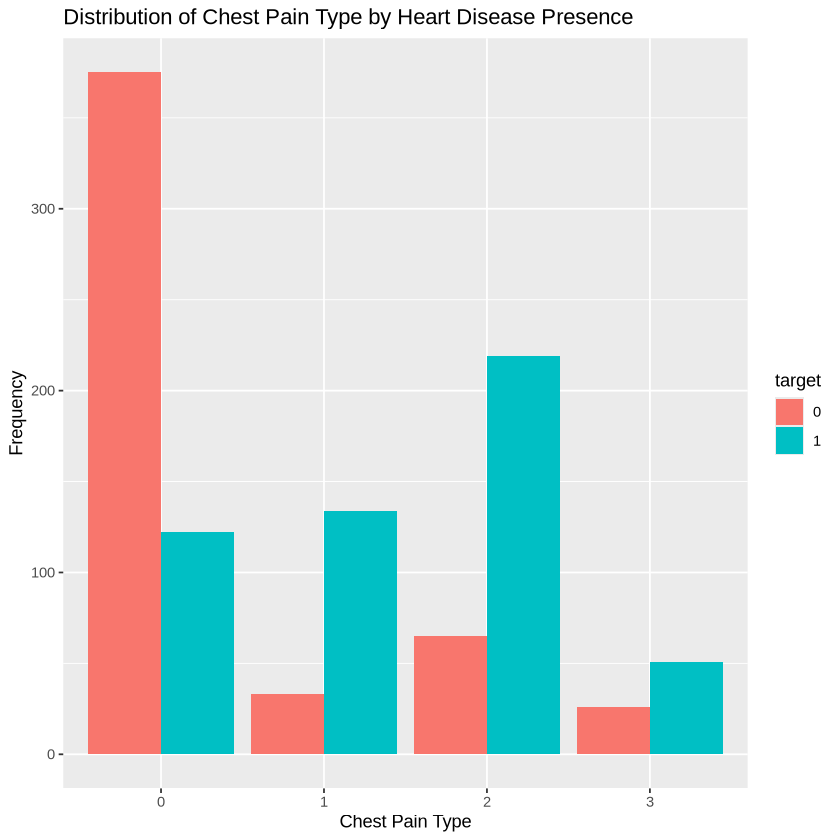

In [8]:
# bar for categorical variable
ggplot(heart_data, aes(x = factor(chest_pain_type), fill = target)) +
geom_bar(position = "dodge") +
labs(title = "Distribution of Chest Pain Type by Heart Disease Presence",
       x = "Chest Pain Type", y = "Frequency")

Based on the plot above we observe that patients with a chest pain type of 1 and 2 are more likely to have heart disease, and patients with chest pain type 0 are more likely to not have heart disease.

## Adjusted Question

I will be focusing on prediction as my primary focus.

**Question :** Can we build a predictive model that identifies patients at risk of heart disease, and which variables (e.g., chest pain type, cholesterol levels, maximum heart rate) are the most predictive of heart disease?

## Methods and Plan

I propose using **Lasso regularization** within a **logistic regression** framework to build a predictive model for identifying patients at risk of heart disease. Lasso regularization (Least Absolute Shrinkage and Selection Operator) is a machine learning technique that simultaneously performs feature selection and coefficient estimation by penalizing large coefficients, effectively shrinking some to zero. This approach enables the model to focus on the most predictive features while avoiding overfitting. Logistic regression is a generative model for binary responses, that can be used for predictions, i.e., using an estimated logistic model (via a training set) to classify new observations from a test set.

**Why is this method approprite?**

- Lasso regression is effective when the dataset has many predictors, as it applies L1 regularization to shrink less important coefficients (even to 0). This results in a simpler model, which is easier to interpret and is less prone to overfitting.

- Logistic regression is the standard method for modeling binary outcomes (e.g., success/failure, yes/no). Its ability to model the probability of an outcome makes it intuitive and interpretable.

**Which assumptions are required, if any, to apply the method selected?**

- The response variable is binary (0 = no disease, 1 = disease), making logistic regression appropriate.

- Lasso assumes a linear relationship between the predictors and the target variable.

- Lasso assumes constant variance of the errors across all levels of the predictors.

- The method assumes that observations in the dataset are independent.

- Logistic regression works best with a sufficiently large sample size to estimate parameters accurately.

**What are the potential limitations or weaknesses of the method selected?**

- Lasso tends to select one predictor from a group of highly correlated variables and ignore the rest, which might lead to biased feature selection, exluding clinically relevant features.

- The results are highly dependent on the choice of λ. Suboptimal tuning may lead to underfitting or overfitting.

- If the dataset is imbalanced (e.g., far more patients without heart disease), Lasso may favor the majority class, leading to suboptimal predictions for the minority class.

- The assumption that the log-odds are linear in the predictors may not hold, leading to model misspecification.

### Plan

- Split the dataset into training and testing sets (e.g., 70-30 split) to evaluate model generalization.
- Use cross-validation to select the optimal regularization parameter (λ).
- Use Lasso regression to identify the most important predictors by applying L1 regularization.
- Predict on the testing set and asses model performance using metrics such as accuracy, precision, recall, and AUC-ROC.
- Interpret Findings

## Implementation of a proposed model

### Split the data into training and testing sets (70-30 split)

In [9]:
heart_data <- heart_data %>% mutate(ID = row_number())

heart_train <- 
    heart_data %>% 
    slice_sample(prop = 0.70)

heart_test <- 
    heart_data %>% 
    anti_join(heart_train, by = "ID")

heart_train <- heart_train  %>% select(-ID)
heart_test <- heart_test  %>% select(-ID)

head(heart_train)
nrow(heart_train)
nrow(heart_test)

age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
44,1,2,130,233,0,1,179,1,0.4,2,0,2,1


[1] 717

[1] 308

### Use cross-validation to select the optimal regularization parameter (λ)

Prepare the model matrix for glmnet

In [10]:
model_matrix_X_train <- 
    model.matrix(object = target ~ .,
                 data = heart_train)[, -1]

matrix_Y_train <- 
    as.matrix(heart_train$target, ncol = 1)

Now we need to find the value of $\lambda$ that provides the largest average AUC.

In [11]:
library(glmnet)
set.seed(1234)

heart_cv_lambda_LASSO <- cv.glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = "binomial",
  type.measure = "auc",
  nfolds = 5
)

heart_cv_lambda_LASSO

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8




Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 5, alpha = 1, family = "binomial") 

Measure: AUC 

      Lambda Index Measure      SE Nonzero
min 0.000437    70  0.9407 0.01196      21
1se 0.023855    27  0.9299 0.01264      16

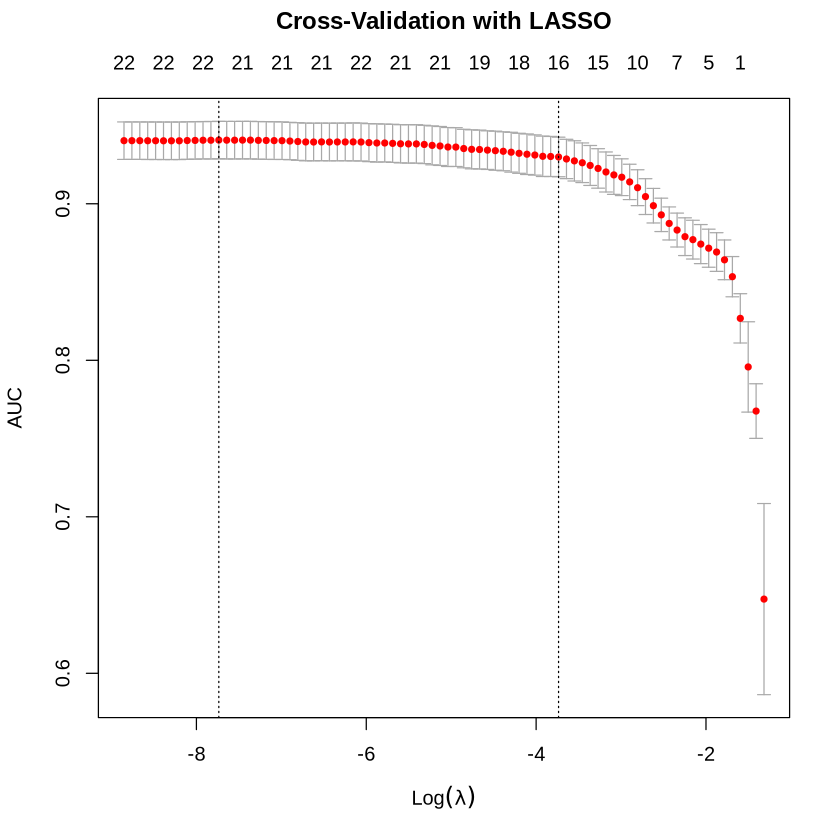

In [12]:
plot(heart_cv_lambda_LASSO, main = "Cross-Validation with LASSO\n\n")

$\hat{\lambda}_{\text{min}}$ which provides the maximum average AUC out of the whole sequence for $\lambda$. This value corresponds to the first dotted line.

$\hat{\lambda}_{\text{1SE}}$ is the highest $\lambda$ for which the model has an average AUC within one standard error of the maximum. This value corresponds to the second dotted line.

The second value is a more regularized choice, which gives a simpler model by increasing the penalty on coefficients.

Lambda min tends to provide the best predictive performance, as it minimizes the error.


In [13]:
# Lambda min gives the best predictive performance
heart_cv_lambda_LASSO$cvm[heart_cv_lambda_LASSO$index["min",]]
heart_cv_lambda_LASSO$cvm[heart_cv_lambda_LASSO$index["1se",]]

[1] 0.9407185

[1] 0.9299144

In [14]:
# Choose lambda min
heart_lambda_AUC_LASSO <- round(heart_cv_lambda_LASSO$lambda.min, 5)
heart_lambda_AUC_LASSO

[1] 0.00044

### Fit Lasso logistic regression

In glmnet, I specify family = "binomial" to fit a logistic regression model, and the alpha = 1 applies Lasso regularization.

In [15]:
heart_LASSO_AUC <- 
    glmnet(
        x = model_matrix_X_train, 
        y = matrix_Y_train,
        alpha = 1,
        family = "binomial",
        lambda = heart_lambda_AUC_LASSO)

In [16]:
coef(heart_LASSO_AUC)

23 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)              -1.254531799
age                       0.036967711
sex1                     -2.020470134
chest_pain_type1          0.758802428
chest_pain_type2          1.786950883
chest_pain_type3          2.187606678
resting_bp               -0.022643261
cholesterol              -0.005636921
fasting_blood_sugar1      0.527347267
resting_ecg1              0.411625747
resting_ecg2             -0.373083575
max_heart_rate            0.032592878
exercise_induced_angina1 -0.881568721
ST_depression            -0.437024565
slope1                   -0.694385104
slope2                    0.354812988
vessels_num1             -2.313068411
vessels_num2             -3.649216295
vessels_num3             -2.142347720
vessels_num4              1.617462785
thal1                     1.846072380
thal2                     1.511938729
thal3                     .          

The coefficients from a Lasso regression represent the change in the log-odds of the target variable (in this case, the probability of heart disease) for a one-unit change in each predictor, assuming all other variables are held constant. The larger the absolute value of the coefficient the more influence they have on the outcome.

The most influential variables:
- Chest Pain Types (chest_pain_type2, chest_pain_type3) – Strong positive effects on heart disease likelihood
- Num of Vessels (vessels_num1, vessels_num2) – Strong negative effects
- Thalassemia Types (thal1, thal2) – Positive effects
- Exercise-induced Angina (exercise_induced_angina1) – Strong negative effect


### Predict on testing set

In [17]:
library(pROC)
library(caret)

model_matrix_X_test <- 
    model.matrix(object = target ~ .,
                 data = heart_test)[, -1]

predicted_probabilities <- predict(heart_LASSO_AUC, 
                                   newx = model_matrix_X_test, 
                                   type = "response")

# ROC
ROC_lasso <- roc(
  response = heart_test$target,
  predictor = predicted_probabilities[,"s0"]
)

predicted_labels <- ifelse(predicted_probabilities[,"s0"] > 0.5, 1, 0)

confusion_matrix <- confusionMatrix(factor(predicted_labels), factor(heart_test$target))

accuracy <- confusion_matrix$overall["Accuracy"]
precision <- confusion_matrix$byClass["Precision"]
recall <- confusion_matrix$byClass["Recall"]

auc_value <- auc(ROC_lasso)
cat("AUC: ", auc_value, "\n")
accuracy
precision
recall

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.9323213 


Accuracy 
0.8441558

Precision 
0.8671329

Recall 
0.8104575

The accuracy of 0.8766 means that about 87.66% of the time, the model's predictions match the actual class labels.

Precision of 0.8955 indicates that, of all the patients predicted to have heart disease, 89.55% actually have the condition.

Recall of 0.8333 indicates that, of all the actual patients who have heart disease, the model correctly identifies 83.33% of them. Recall is important when the cost of false negative is high. In a medical context it is important to have high recall, because we need to ensure that all the patients with heart disease are identified.

### Visualization of results

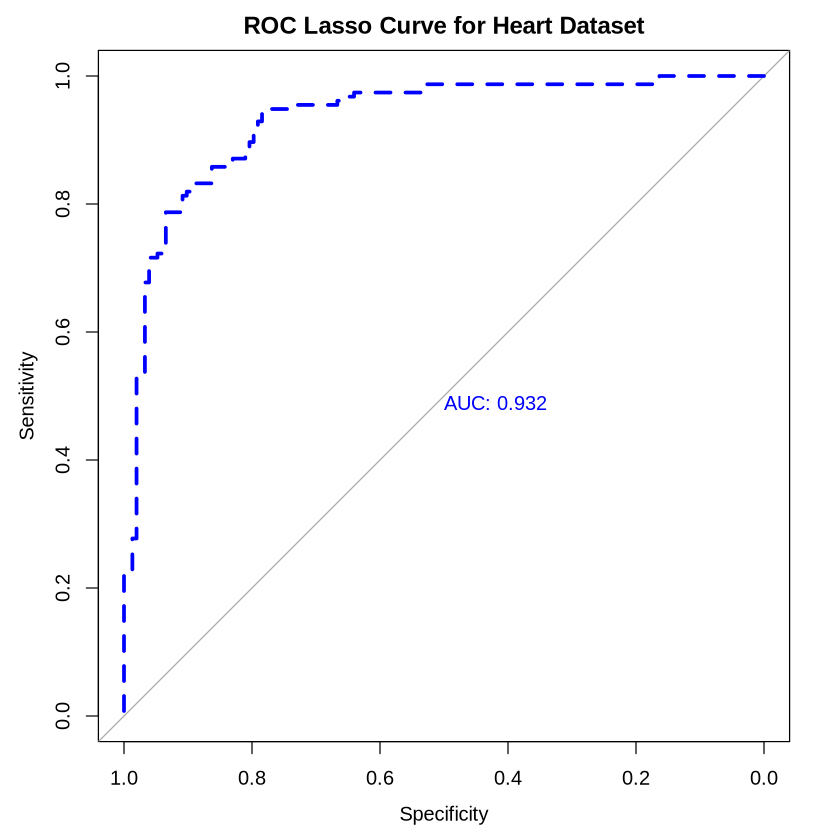

In [18]:
plot(ROC_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Lasso Curve for Heart Dataset"
)

### Interpretation of Results

An AUC of 0.9412 indicates that the model has a high ability to distinguish between the two classes (presence of heart disease)



In [19]:
# Checking if there is imbalance in the dataset
table(heart_data$target)


  0   1 
499 526 

A potential issue with this method would be if there was class imbalance causing bias in predicting the majority class, but as shown above this shouldn't affect this model.

For better recall (importnat if we want to identify more patients with heart disease), we could try changing the decision threshold for identifying the presence of heart disease.

Overall the model is performing well, with high AUC, precision, recall, and F1 score. 